# Importing Libraries

# New Section

In [34]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
nltk.download('punkt')
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Loading Dataset

In [6]:
# Load the CSV dataset
df = pd.read_csv('/content/twitter_training.csv', names=["ID", "Brand", "Sentiment", "Text"])

In [7]:
df.head()

,ID,Brand,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


# Data Preprocessing

In [11]:
df.drop(['ID'], axis=1, inplace=True,)

In [12]:
df.isna().any()

Brand        False
Sentiment    False
Text          True
dtype: bool

In [13]:
df.isna().sum()

Brand          0
Sentiment      0
Text         686
dtype: int64

In [14]:
df.dropna(inplace=True)

In [16]:
df.Text.duplicated().any()

True

In [17]:
df.head()

,Brand,Sentiment,Text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [20]:
df.Sentiment.value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: Sentiment, dtype: int64

In [25]:
# Show sample
for i in range(5):
    print(f"{i+1}: {df['Text'][i]} -> {df['Sentiment'][i]}")

1: im getting on borderlands and i will murder you all , -> Positive
2: I am coming to the borders and I will kill you all, -> Positive
3: im getting on borderlands and i will kill you all, -> Positive
4: im coming on borderlands and i will murder you all, -> Positive
5: im getting on borderlands 2 and i will murder you me all, -> Positive


# Applying NLP Technique

In [28]:
# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

In [29]:
# use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [30]:
df['Preprocessed Text'] = df['Text'].apply(preprocess)

In [31]:
df.head()

,Brand,Sentiment,Text,Preprocessed Text
0,Borderlands,Positive,im getting on borderlands and i will murder yo...,m get borderland murder
1,Borderlands,Positive,I am coming to the borders and I will kill you...,come border kill
2,Borderlands,Positive,im getting on borderlands and i will kill you ...,m get borderland kill
3,Borderlands,Positive,im coming on borderlands and i will murder you...,m come borderland murder
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,m get borderland 2 murder


In [35]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['Predicted_Sentiment'] = df['Preprocessed Text'].apply(get_sentiment)



# Data Visualization
## Bar Chart

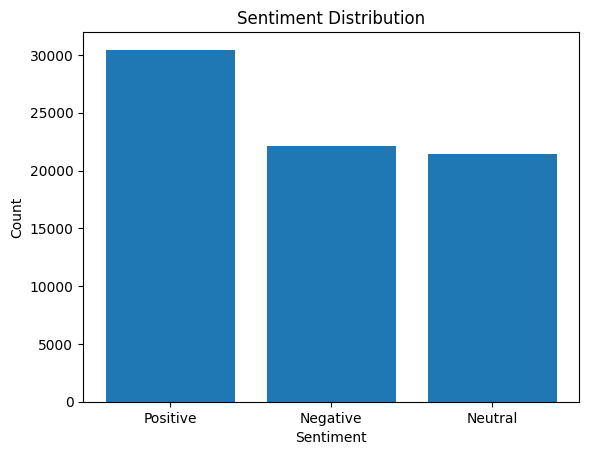

In [36]:
sentiment_counts = df['Predicted_Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

## Showing Sentiment in WordCloud

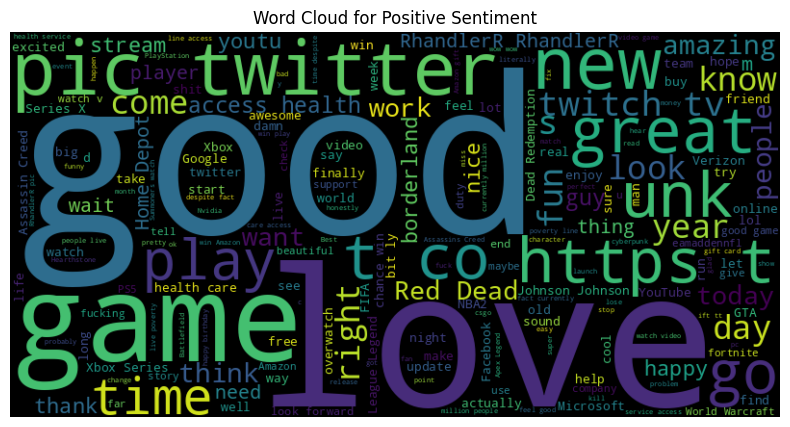

In [41]:
# Create a function to generate and display a word cloud
def generate_word_cloud(sentiment):
    text = ' '.join(df[df['Predicted_Sentiment'] == sentiment]['Preprocessed Text'])

    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

# Generate and display word clouds for each sentiment category
generate_word_cloud('Positive')


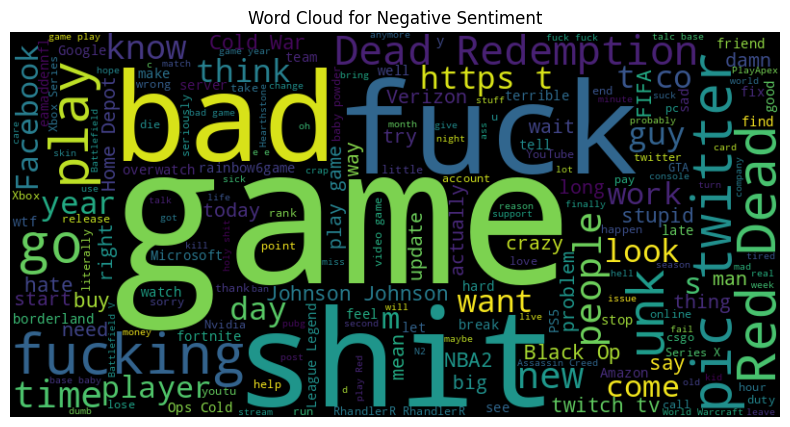

In [42]:
generate_word_cloud('Negative')


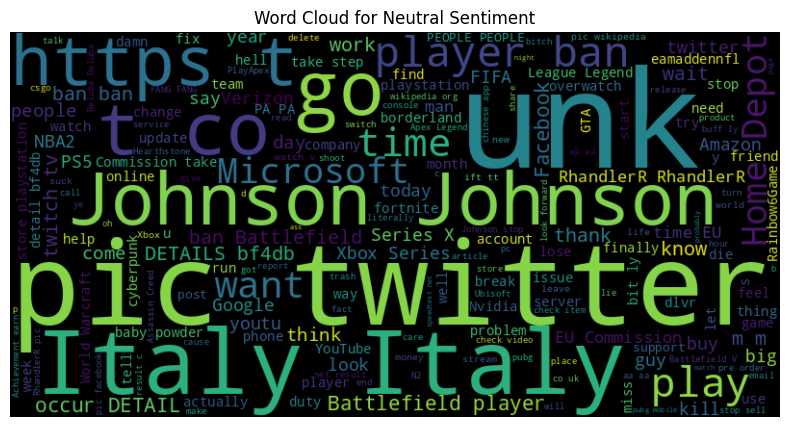

In [43]:
generate_word_cloud('Neutral')